<a href="https://colab.research.google.com/github/MohammadAli147369/Machine-learning-projects/blob/main/Ensemble_Techniques_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
df = pd.read_csv('/content/day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Observations

1. There are no missing values in the dataset.
2. There is no duplicates in the dataset.

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
sta_dev = np.std(df['windspeed'])
sta_dev

0.07744484442114578

casual + registered = cnt

dteday is the date in object, month and yr have all the necessary data for the model.

so we remove both casual and registered

In [ ]:
df = df.drop(['dteday', 'casual', 'registered'], axis =1)

In [ ]:
df

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [ ]:
x = df.drop(['cnt'], axis=1)
y = df['cnt']

In [ ]:
x

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754


In [ ]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(511, 12)
(220, 12)
(511,)
(220,)


In [ ]:
model = RandomForestRegressor()

In [ ]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
model.score(x_train, y_train)

0.9814441659305135

In [ ]:
model.score(x_test, y_test)

0.8759562606812829

In [ ]:
print(mean_squared_error(y_test, model.predict(x_test)))

499078.6382631817


In [ ]:
print(mean_absolute_error(y_test, model.predict(x_test)))

469.0402272727273


In [ ]:
# Define the Random Forest Regressor
r = RandomForestRegressor(random_state=1)

# Define the parameter grid
p = {
    'max_depth': [4, 5, 7, 8, None],
    'max_features': ['sqrt', 'log2', None],
    'n_estimators': [80, 90, 100, 110, 120]
}

# Define the scoring metric (you can change it based on your requirements)
core = metrics.make_scorer(metrics.r2_score)

# Perform randomized search
random_object = RandomizedSearchCV(r, p, scoring=core, cv=3, n_iter=50, verbose=2)
random_object = random_object.fit(x_train, y_train)

# Get the best estimator
best_estimator = random_object.best_estimator_

# Fit the best estimator on the training data
best_estimator.fit(x_train, y_train)



Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END ...max_depth=7, max_features=sqrt, n_estimators=110; total time=   0.2s
[CV] END ...max_depth=7, max_features=sqrt, n_estimators=110; total time=   0.2s
[CV] END ...max_depth=7, max_features=sqrt, n_estimators=110; total time=   0.2s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=80; total time=   0.1s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=80; total time=   0.1s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=80; total time=   0.1s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=120; total time=   0.2s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=120; total time=   0.2s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=120; total time=   0.2s
[CV] END ....max_depth=4, max_features=sqrt, n_estimators=80; total time=   0.1s
[CV] END ....max_depth=4, max_features=sqrt, n_estimators=80; total time=   0.1s
[CV] END ....max_depth=4, max_features=sqrt, n_

RandomForestRegressor(max_features='log2', n_estimators=120, random_state=1)

In [ ]:
best_estimator = RandomForestRegressor(max_features='sqrt', n_estimators=120, random_state=1)

# Train the best estimator on your training data
best_estimator.fit(x_train, y_train)

# Make predictions on the test data
predictions = best_estimator.predict(x_test)

# Evaluate the performance of the model, e.g., using RMSE and R-squared
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Root Mean Squared Error (RMSE): 702.4958540960196
R-squared: 0.8773427003645148


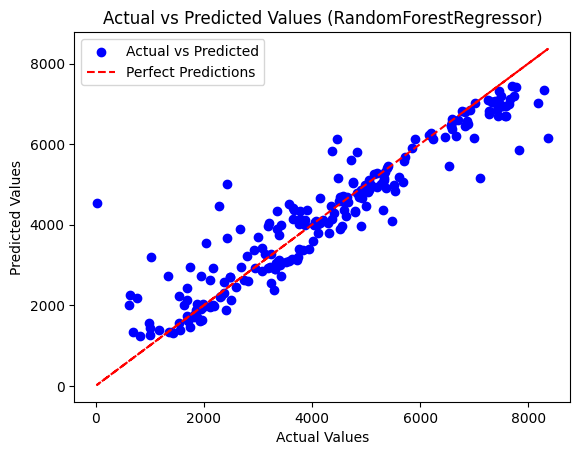

In [ ]:
plt.scatter(y_test, predictions, color='blue', label='Actual vs Predicted')

# Plot a diagonal line representing perfect predictions
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Predictions')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (RandomForestRegressor)')
plt.legend()
plt.show()

In [ ]:
df

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(df.drop(columns=['cnt']), df['cnt'], test_size=0.2, random_state=42)


under_sampler = RandomUnderSampler(random_state=42)


x_train_under, y_train_under = under_sampler.fit_resample(x_train1, y_train1)


model_rf_under = RandomForestRegressor(random_state=42)
model_rf_under.fit(x_train_under, y_train_under)


predictions_under = model_rf_under.predict(x_test1)


rmse_under = mean_squared_error(y_test, predictions_under, squared=False)
print("RMSE on under-sampled data:", rmse_under)

RMSE on under-sampled data: 706.303566269129


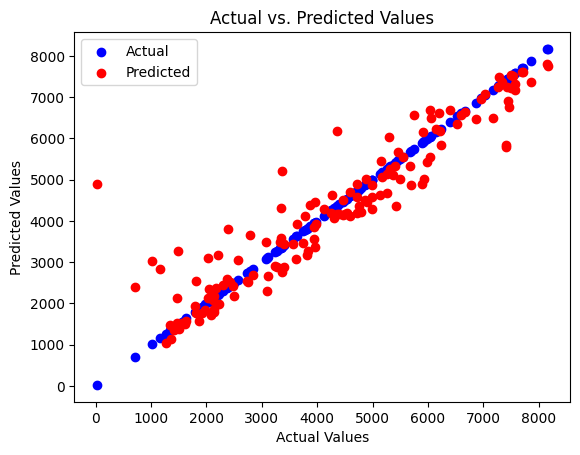

In [ ]:

plt.scatter(y_test1, y_test, color='blue', label='Actual')


plt.scatter(y_test1, predictions_under, color='red', label='Predicted')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()